In [3]:
library(TSA)


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar



In [4]:
Y_t <- rep(0, 144)
t <- 1:144
phi <- runif(144)
error <- rnorm(144)
for (i in 1:144){
    Y_t[i] <- 47 + 20*cos(2*pi*(t[i]/1.5) + phi[i]) + error[i]
}

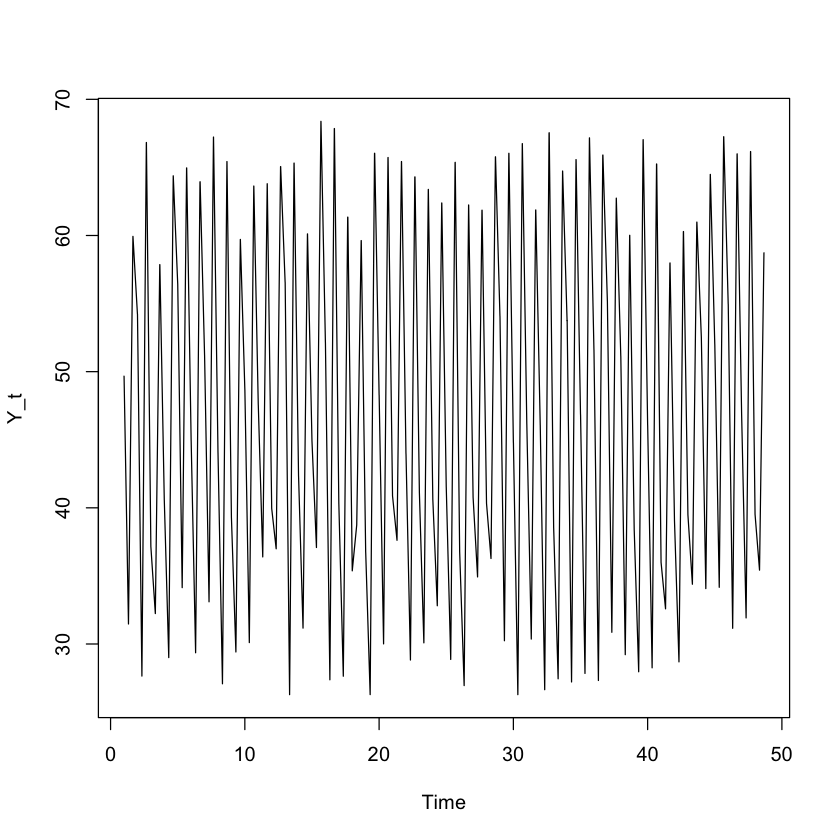

In [14]:
Y_t <- ts(Y_t, frequency = 3)
plot(Y_t)

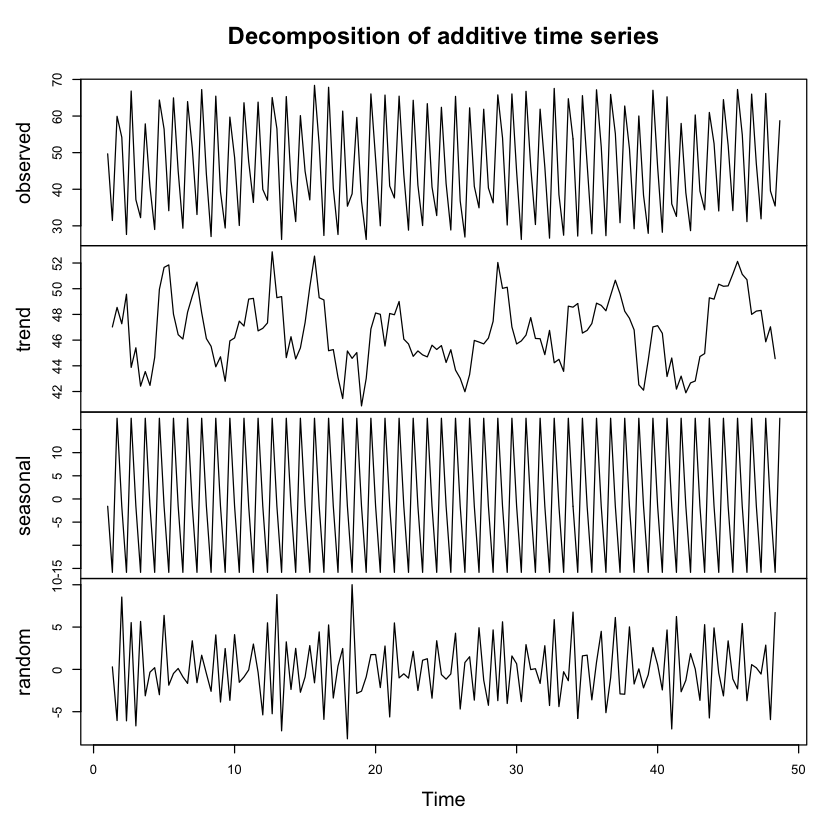

In [15]:
plot(decompose(Y_t))

In [7]:
var(Y_t)
mean(Y_t)

[1] 0.5872484

[1] -0.01620107

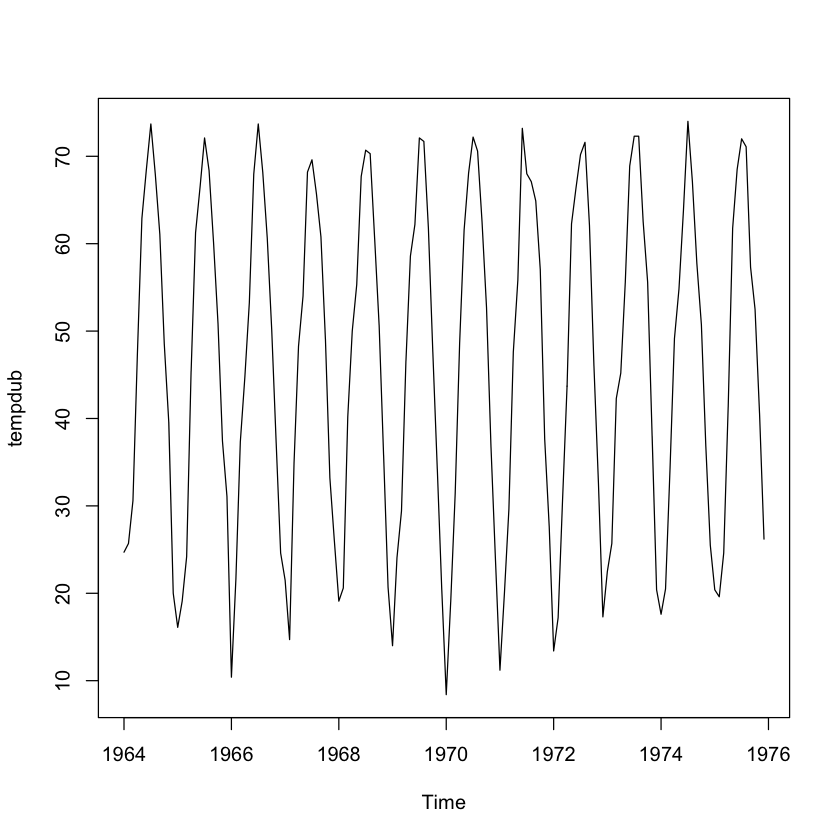

In [18]:
data("tempdub")
plot(tempdub)

In [19]:
decompose(tempdub)

$x
      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1964 24.7 25.7 30.6 47.5 62.9 68.5 73.7 67.9 61.1 48.5 39.6 20.0
1965 16.1 19.1 24.2 45.4 61.3 66.5 72.1 68.4 60.2 50.9 37.4 31.1
1966 10.4 21.6 37.4 44.7 53.2 68.0 73.7 68.2 60.7 50.2 37.2 24.6
1967 21.5 14.7 35.0 48.3 54.0 68.2 69.6 65.7 60.8 49.1 33.2 26.0
1968 19.1 20.6 40.2 50.0 55.3 67.7 70.7 70.3 60.6 50.7 35.8 20.7
1969 14.0 24.1 29.4 46.6 58.6 62.2 72.1 71.7 61.9 47.6 34.2 20.4
1970  8.4 19.0 31.4 48.7 61.6 68.1 72.2 70.6 62.5 52.7 36.7 23.8
1971 11.2 20.0 29.6 47.7 55.8 73.2 68.0 67.1 64.9 57.1 37.6 27.7
1972 13.4 17.2 30.8 43.7 62.3 66.4 70.2 71.6 62.1 46.0 32.7 17.3
1973 22.5 25.7 42.3 45.2 55.5 68.9 72.3 72.3 62.5 55.6 38.0 20.4
1974 17.6 20.5 34.2 49.2 54.8 63.8 74.0 67.1 57.7 50.8 36.8 25.5
1975 20.4 19.6 24.6 41.3 61.8 68.5 72.0 71.1 57.3 52.5 40.6 26.2

$seasonal
             Jan         Feb         Mar         Apr         May         Jun
1964 -30.1644571 -25.8519571 -13.3951389   0.3950126  11.5942551

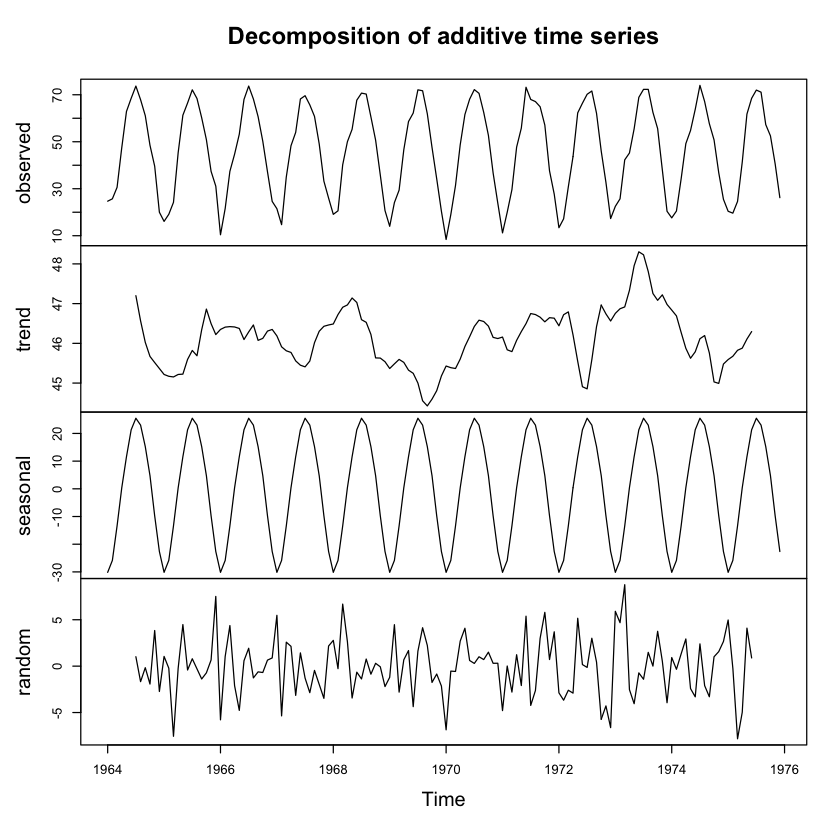

In [20]:
plot(decompose(tempdub))

In [31]:
data <- data.frame(Y_t=Y_t, tempdub=tempdub)
head(data)

Y_t,tempdub
44.14544,24.7
31.04044,25.7
64.73521,30.6
47.32427,47.5
32.43941,62.9
65.73999,68.5


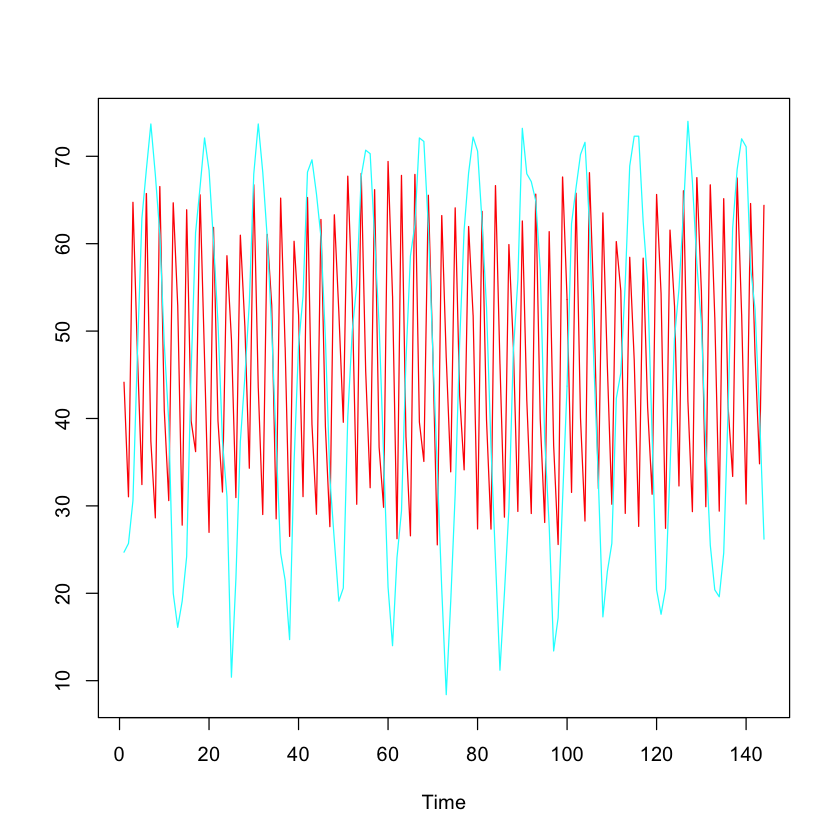

In [32]:
ts.plot(data, col=rainbow(2))

In [34]:
lm <- lm(tempdub~t)
summary(lm)


Call:
lm(formula = tempdub ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.871 -19.066   2.394  17.053  28.156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.46736    3.25513  13.968   <2e-16 ***
t            0.01102    0.03895   0.283    0.778    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.43 on 142 degrees of freedom
Multiple R-squared:  0.0005629,	Adjusted R-squared:  -0.006475 
F-statistic: 0.07998 on 1 and 142 DF,  p-value: 0.7777


In [52]:
nlm <- nls(formula = tempdub~C+D*t+A*cos(2*pi*(B*t)), start=list(A=20, B=1/1.5, C=47, D=0.011))
summary(nlm)


Formula: tempdub ~ C + D * t + A * cos(2 * pi * (B * t))

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
A -0.14735    2.30927  -0.064    0.949    
B  0.66623    0.02985  22.318   <2e-16 ***
C 45.46412    3.27864  13.867   <2e-16 ***
D  0.01106    0.03923   0.282    0.778    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.57 on 140 degrees of freedom

Number of iterations to convergence: 26 
Achieved convergence tolerance: 7.85e-07


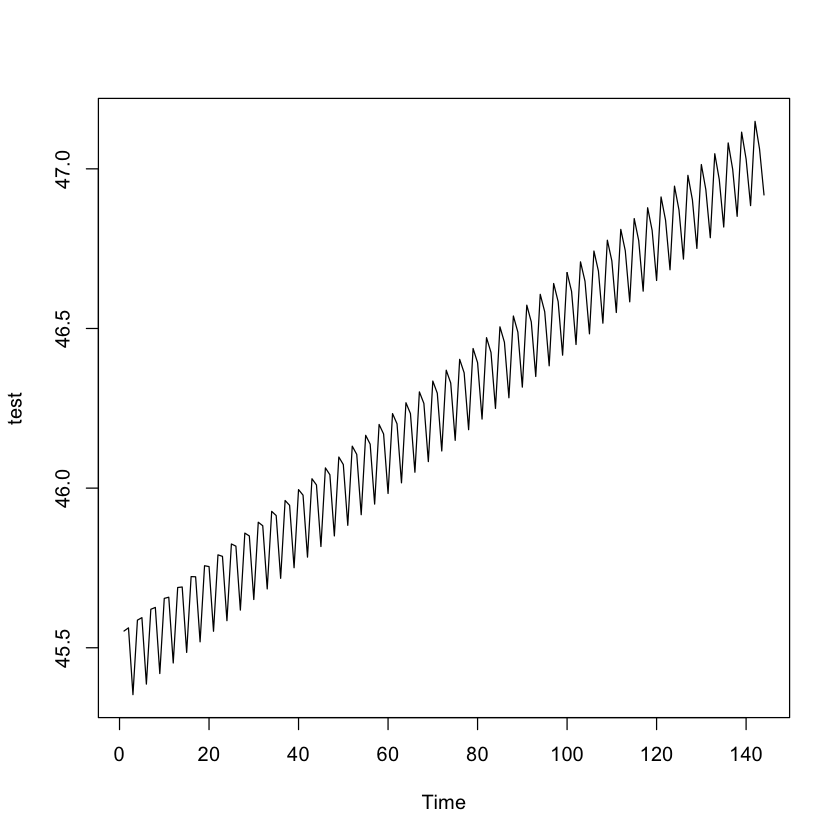

In [51]:
test <- rep(0, 144)
for (time in t){
    test[time] <- 45.46736+.01102*time+-.14731*cos(2*pi*(.66623*time))
}
plot.ts(test)

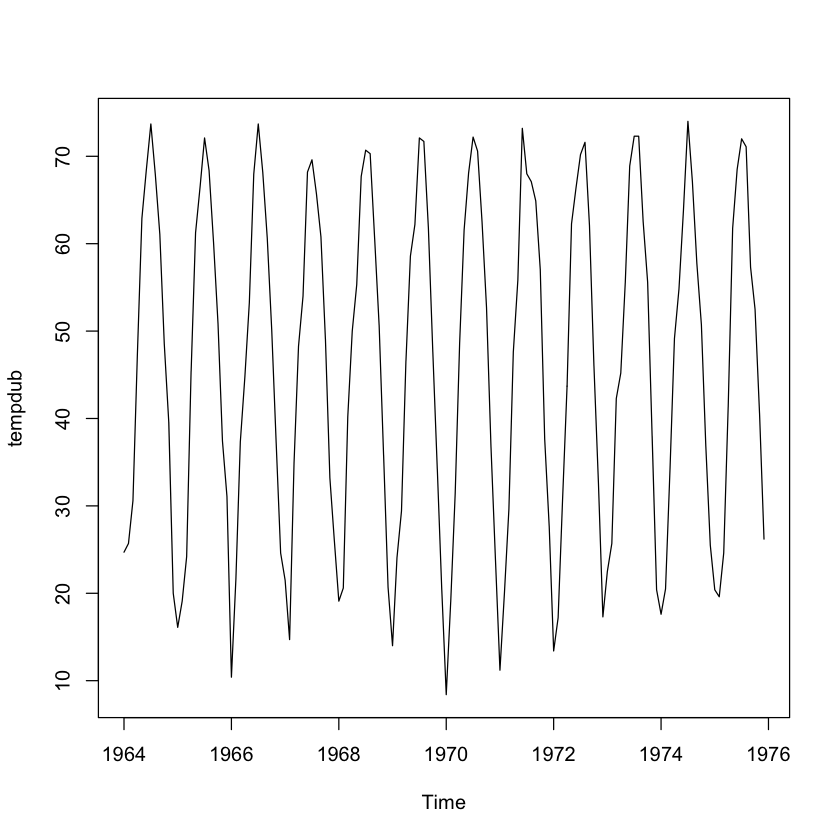

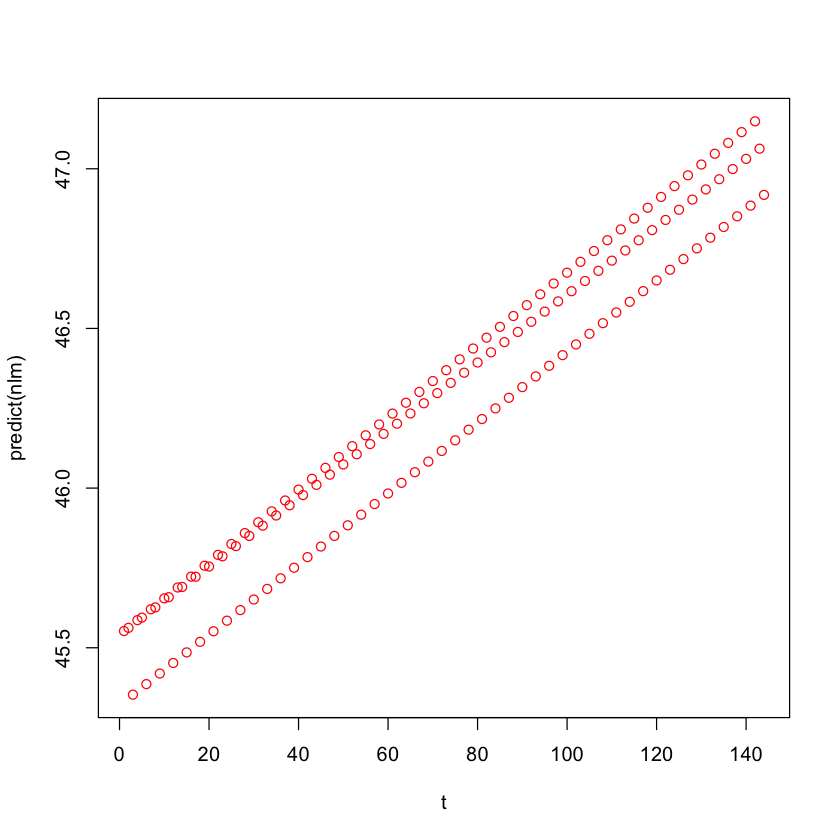

In [48]:
plot(tempdub)
plot(t, predict(nlm), col="red")
help(nls)